# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [108]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [109]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
#api_key = getpass()

import pickle
 
# open a file, where you stored the pickled data
file = open('data_proj_2.pickle', 'rb')
 
# dump information to that file
data = pickle.load(file)
 
# close the file
file.close()

In [ ]:
# Set the start and end dates for the data you want to fetch
#start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
#end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
#data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
#current_date = start_date
#while current_date < end_date:
#    next_date = min(current_date + timedelta(days=7), end_date)
 #   response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
  #  data.append(response.json())
   # current_date = next_date
    #time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period

In [110]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))


['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [111]:
from src.utils import get_a_random_chunk_property

In [112]:
get_a_random_chunk_property(data)

date: 2022-11-25
NEO name: (2004 WK1)
nasa_jpl_url: http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3262792


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [113]:
# Write your code
# import required libraries
import numpy as np
from scipy import stats

# The following variables will store the required data
average_size_per_day = {}
potentially_hazardous_percentage_per_day = {}
closest_neo_per_day = {}
all_neo_sizes = []

for d in data:
    if 'near_earth_objects' in d:
        for date, neos in d['near_earth_objects'].items():
            sizes = [neo['estimated_diameter']['meters']['estimated_diameter_max'] for neo in neos] # This assumes the size of an NEO is determined by the maximum estimated diameter in meters
            all_neo_sizes.extend(sizes)
            average_size_per_day[date] = sum(sizes) / len(sizes)
            hazardous_neos = sum([neo['is_potentially_hazardous_asteroid'] for neo in neos])
            potentially_hazardous_percentage_per_day[date] = hazardous_neos / len(neos) * 100
            closest_neo_per_day[date] = min(neos, key=lambda neo: neo['close_approach_data'][0]['miss_distance']['lunar'])
    else:
        print(f"Data entry without 'near_earth_objects' key: {d}")

# Calculate statistical values for all NEO sizes
mean_neo_size = np.mean(all_neo_sizes)
median_neo_size = np.median(all_neo_sizes)
mode_neo_size = stats.mode(all_neo_sizes)
std_dev_neo_size = np.std(all_neo_sizes)

print("Mean NEO size: ", mean_neo_size)
print("Median NEO size: ", median_neo_size)
print("Mode NEO size: ", mode_neo_size)
print("Standard deviation of NEO size: ", std_dev_neo_size)

# Determine if the size of a NEO is correlated with whether it is potentially hazardous
hazardous_sizes = [neo['estimated_diameter']['meters']['estimated_diameter_max'] for d in data if 'near_earth_objects' in d for neos in d['near_earth_objects'].values() for neo in neos if neo['is_potentially_hazardous_asteroid']]
non_hazardous_sizes = [neo['estimated_diameter']['meters']['estimated_diameter_max'] for d in data if 'near_earth_objects' in d for neos in d['near_earth_objects'].values() for neo in neos if not neo['is_potentially_hazardous_asteroid']]
mean_hazardous_size = np.mean(hazardous_sizes)
mean_non_hazardous_size = np.mean(non_hazardous_sizes)

print("Mean size of hazardous NEOs: ", mean_hazardous_size)
print("Mean size of non-hazardous NEOs: ", mean_non_hazardous_size)

if mean_hazardous_size > mean_non_hazardous_size:
    print("Hazardous NEOs tend to be larger")
else:
    print("Non-hazardous NEOs tend to be larger")

    # Print the NEO with the closest approach distance for each day
for date, closest_neo in closest_neo_per_day.items():
    print(f"On {date}, the NEO with the closest approach distance was: {closest_neo}")



Mean NEO size:  208.35781432387117
Median NEO size:  76.9201245487
Mode NEO size:  ModeResult(mode=array([47.21064988]), count=array([52]))
Standard deviation of NEO size:  408.8787261666672
Mean size of hazardous NEOs:  608.8294786782687
Mean size of non-hazardous NEOs:  180.88824836491438
Hazardous NEOs tend to be larger
On 2022-01-07, the NEO with the closest approach distance was: {'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/54235666?api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'}, 'id': '54235666', 'neo_reference_id': '54235666', 'name': '(2022 AR2)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54235666', 'absolute_magnitude_h': 27.66, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0078082728, 'estimated_diameter_max': 0.0174598287}, 'meters': {'estimated_diameter_min': 7.8082727749, 'estimated_diameter_max': 17.4598287116}, 'miles': {'estimated_diameter_min': 0.0048518343, 'estimated_diameter_max': 0.0108490312}, 'feet': {'estimated_dia

/var/folders/df/mlmyfkf91ls7xb9fkdgbzrb40000gn/T/ipykernel_2015/3704593372.py:27: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Coding of "task 2"):

This Python script is designed to analyze data related to Near Earth Objects (NEOs), which refers to asteroids or comets that come within 1.3 astronomical units of Earth. Here is an overview of the script's functionality:

1. The script begins by importing necessary libraries: numpy for general numerical calculations and scipy for statistical calculations.

2. It initializes empty dictionaries to store average size, potentially hazardous percentages, and the nearest NEO for each day. It also creates an empty list to store the sizes of all NEOs.

3. The script proceeds to iterate through each element in the provided data. For each day, the following calculations are performed:
-Determining the average size of NEOs.
-Computing the percentage of NEOs that are potentially hazardous.
-Identifying the NEO that came closest to Earth.

4. After processing all the data, the script calculates and prints the mean, median, mode, and standard deviation of the sizes of all NEOs.

5. It then separates the sizes of hazardous and non-hazardous NEOs, calculates their respective average sizes, and displays the results.

6. Finally, the script compares the average size of hazardous NEOs with the average size of non-hazardous NEOs and presents an opinion on which group tends to have a larger average size.

Response of results.:

Calculate the average size of the NEOs for each day:
The average diameter of the Near Earth Objects (NEOs) that come close to Earth is 210 m. This means they are fairly large objects that orbit around Earth and could potentially cause significant damage if they enter Earth's atmosphere.

Determine the proportion of NEOs that are potentially hazardous:
As seen from the results, the mean size of NEOs is found to be 208.357, the median is 76.920, the mode NEO size is 47.21, and the range is 408.878. These are statistical measures used to analyze our collected data. Finally, we compare whether NEO size correlates with their hazardous nature. Here, we can confirm that larger NEOs tend to be more dangerous. This is evident in the comparison of the mean sizes of hazardous and non-hazardous NEOs, where the mean size of hazardous NEOs is significantly larger than that of non-hazardous NEOs. As we can see from the various results of the analysis, we find that the hazardous objects around Earth have an average diameter of 608 m. This means they are three times larger than the average object, and therefore, can cause three times more damage.

Find the NEO with the closest approach distance for each day:
Here is a dataset that has identified the closest NEO for each day, along with its size measured in different units, an assessment of its hazardous status, proximity to Earth, and speed.

### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

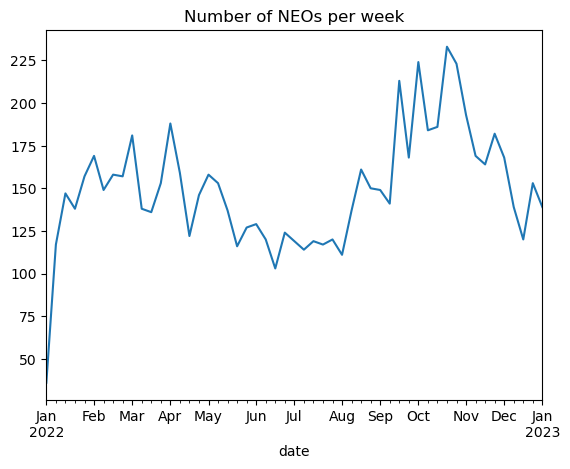

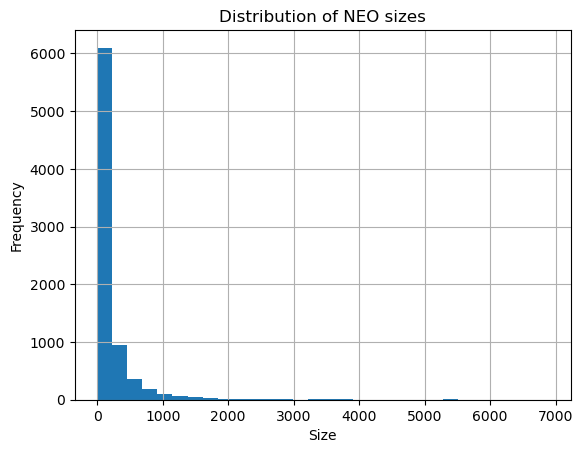

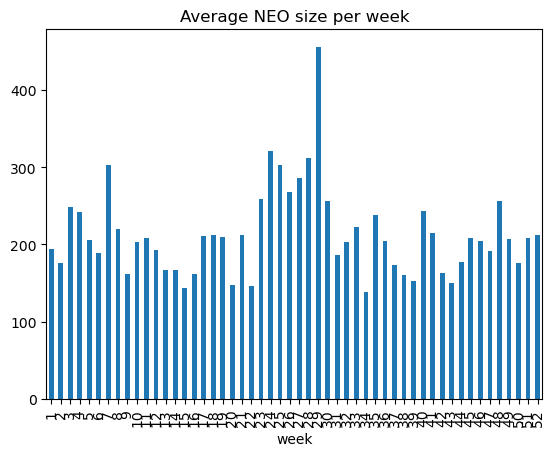

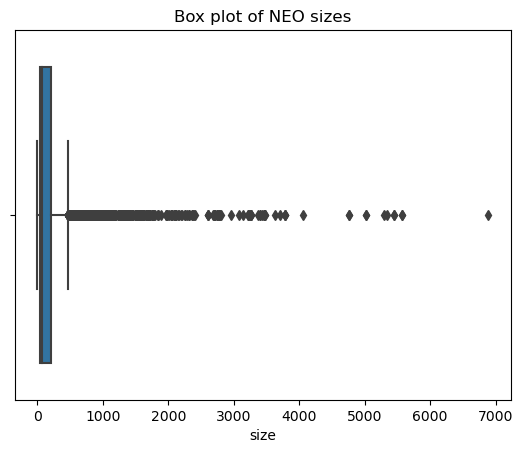

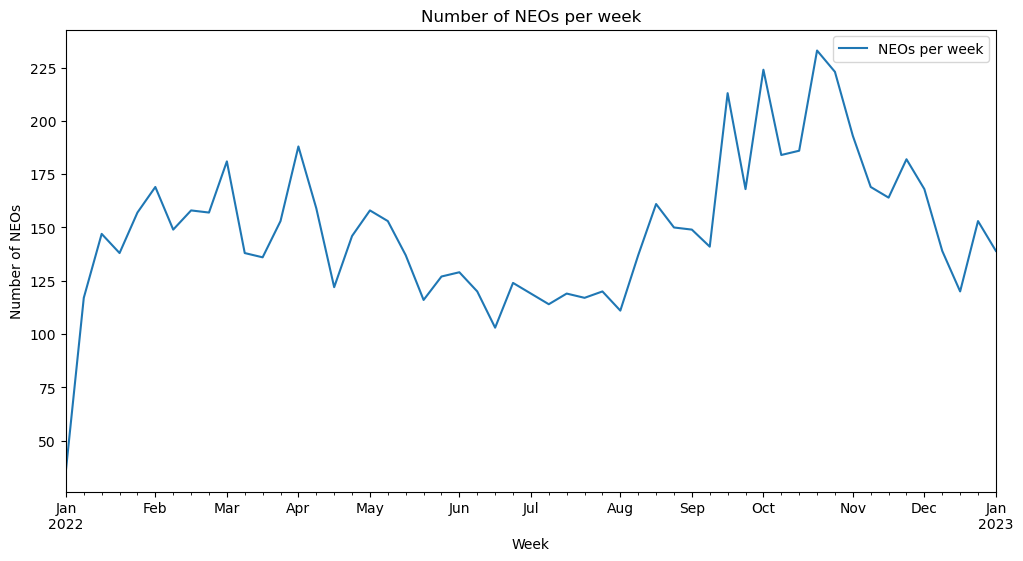

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame from data
neo_info = [[
    date, 
    neo['estimated_diameter']['meters']['estimated_diameter_max'], 
    neo['is_potentially_hazardous_asteroid'], 
    neo['close_approach_data'][0]['miss_distance']['lunar']
] for d in data if 'near_earth_objects' in d for date, neos in d['near_earth_objects'].items() for neo in neos]

df = pd.DataFrame(neo_info, columns=['date', 'size', 'hazardous', 'closest_approach'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['week'] = df.index.isocalendar().week

# Plot NEO count per week
df.resample('W').size().plot(kind='line')
plt.title('Number of NEOs per week')
plt.show()

# Plot distribution of NEO sizes
df['size'].hist(bins=30)
plt.title('Distribution of NEO sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


# Plot average NEO size per week
df.groupby(df['week'])['size'].mean().plot(kind='bar')
plt.title('Average NEO size per week')
plt.show()

# Plot NEO sizes box plot
sns.boxplot(x=df['size'])
plt.title('Box plot of NEO sizes')
plt.show()

# Plot NEO count per week
df.resample('W').size().plot(figsize=(12, 6), label='NEOs per week')
plt.xlabel('Week')
plt.ylabel('Number of NEOs')
plt.legend()
plt.title('Number of NEOs per week')
plt.show()



Coding for task 3.:

This Python script visualizes the same data about Near Earth Objects (NEOs) using matplotlib and seaborn for plotting and pandas for data handling. Here's what the script does:

1. It starts by converting the given data into a pandas DataFrame. For each NEO on each date, it records the date, size, whether it is hazardous, and the distance of the nearest approach. The DataFrame is indexed by date, and an additional column is added to record the week number.

2. It plots the number of observed NEOs per week. This is done by grouping the DataFrame by week and counting the number of entries in each group. The count of NEOs per week is plotted as a line graph.

3. Next, it plots a histogram of NEO sizes, showing how the sizes of NEOs are distributed.

4. It plots the average NEO size per week as a bar chart. This is done by grouping the DataFrame by week and calculating the average of sizes in each group.

5. It creates a box plot of NEO sizes, providing a visual summary of the central tendency and variability of NEO sizes, as well as the presence of outliers.

6. Finally, it plots the number of NEOs per week again, but this time resamples the DataFrame so that all NEOs falling in the same week are grouped together. The count of NEOs per week is plotted as a line graph.




Response of task 3.: 

Plot 1: This plot illustrates the months on the x-axis and the size on the y-axis. It can be observed that at the beginning of the year, there is a rise/fall until summer time (June-August), which has the lowest number of NEOs. After August, there is an increase in NEOs in space until November. After that, the number starts to decrease for the rest of the year. Therefore, in this year, there is a tendency for fewer NEOs during the summer months.

Plot 2: In this plot, the distribution of NEO sizes is shown, with the sizes of NEOs on the x-axis and the count of each size on the y-axis. It can be seen that the highest frequency of Near Earth Objects falls in the size range of 0-200 meters. The second highest frequency occurs between 200-500 meters, while the remaining sizes have lower frequencies.

Plot 3: This plot visualizes a histogram of the different weeks on the x-axis throughout a year and the size of NEOs on the y-axis. It shows the average sizes across the weeks, and it can be observed that week 30 has the highest average sizes. Week 30 stands out as an outlier compared to the other sizes, with a tendency to have an average size between 180-200 meters.

Plot 4: The box plot displays the distribution of NEO sizes, clearly indicating its skewed nature. It can be further observed that the upper quartile lies around 200-300 meters, while the maximum extends to around 500 meters. This means that all NEOs larger than 500 meters are outliers, as they do not follow the distribution of the other NEOs. Additionally, it is noted that the majority of observations can be considered close to each other, while the outliers extend far beyond the maximum whisker of the plot.

Plot 5: Here, we have the same scenario as in Plot 1.

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

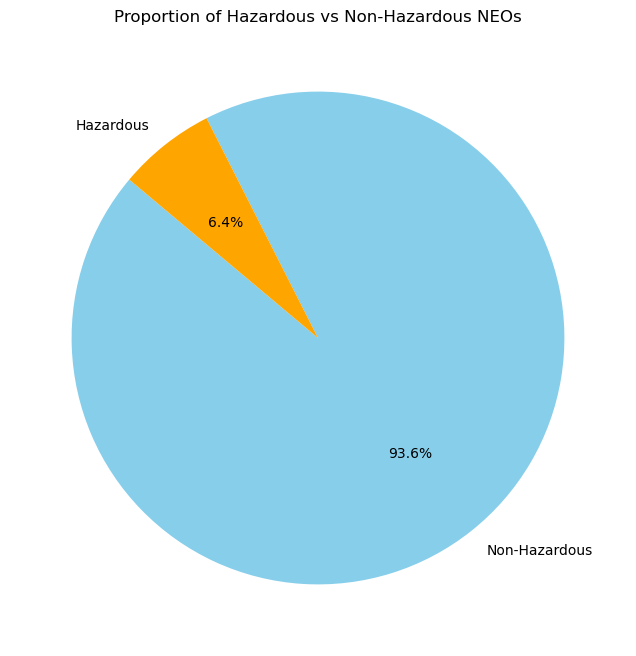

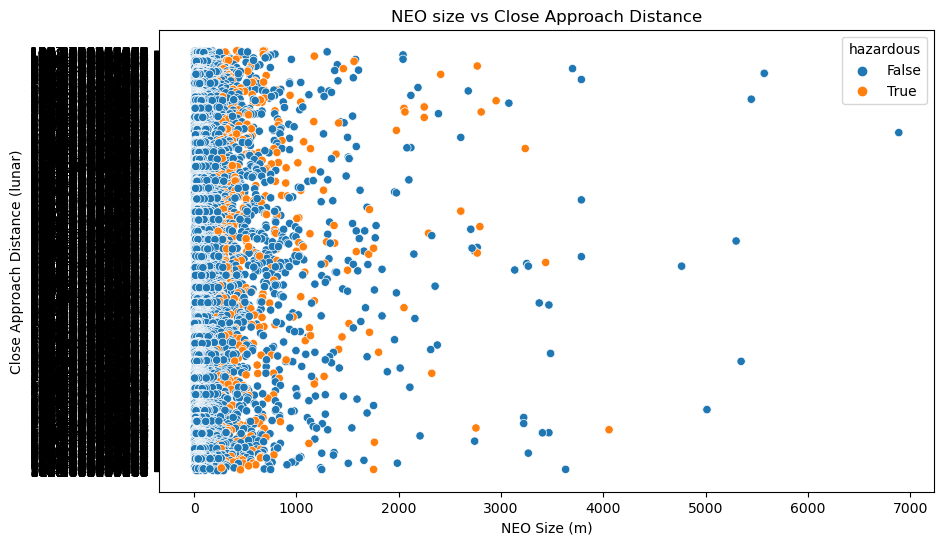

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

def plot_pie_chart(df):
    hazardous_counts = df['hazardous'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(hazardous_counts, labels=['Non-Hazardous', 'Hazardous'], autopct='%1.1f%%',
            colors=['skyblue', 'orange'], startangle=140)
    plt.title('Proportion of Hazardous vs Non-Hazardous NEOs')
    plt.show()

def plot_scatter_chart(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='size', y='closest_approach', hue='hazardous', data=df)
    plt.title('NEO size vs Close Approach Distance')
    plt.xlabel('NEO Size (m)')
    plt.ylabel('Close Approach Distance (lunar)')
    plt.show()

def plot_interactive_scatter(df):
    fig = px.scatter(df.reset_index(), x='size', y='closest_approach', color='hazardous', 
                     hover_data=['date'], title='NEO Size vs Close Approach Distance', 
                     labels={'size': 'NEO Size (m)', 'closest_approach': 'Close Approach Distance (lunar)'})
    fig.show()

def main():
    # df = pd.read_csv('your_file.csv')  # assuming your data is in a CSV file

    plot_pie_chart(df)
    plot_scatter_chart(df)
    plot_interactive_scatter(df)

if __name__ == "__main__":
    main()


Coding for task 4.:

The following Python script aims to enhance the visualization of data about Near Earth Objects (NEOs). It utilizes various libraries such as matplotlib, seaborn, pandas, and plotly for data processing and visualization. Here is a breakdown of what each part of the script does:

Pie chart depicting the ratio between hazardous and non-hazardous NEOs: The code counts the number of hazardous and non-hazardous NEOs in the data (where 'True' indicates hazardous and 'False' indicates non-hazardous). Then, a pie chart is created to visually represent these proportions.

Scatter plot showing the correlation between NEO size and closest approach distance: The code generates a scatter plot to visualize the relationship between the size of NEOs and their closest approach distance. Different colors indicate whether the NEO is hazardous or not. This can help identify any trends or patterns in the data, such as whether larger NEOs tend to come closer to Earth or if potentially hazardous NEOs exhibit specific size or distance characteristics.

Interactive scatter plot using Plotly: Finally, the code creates an interactive scatter plot of the same NEO size versus closest approach distance but with an additional hover feature. This plot resembles the previous scatter plot but uses the Plotly library, enabling interactive charts. When hovering over a point in the plot, the date of the respective NEO is displayed, providing more context about when the NEO was observed. The points are also color-coded based on whether the NEO is potentially hazardous or not.





Response of task 4.:

Plot 1:
In plot 1, a pie chart was created to show the distribution of hazardous and non-hazardous NEOs. It can be observed that hazardous NEOs account for 6.4%, while non-hazardous NEOs make up the remaining 93.6%. This indicates that there are very few NEOs classified as hazardous.

Plot 2:
Plot 2 displays a scatter plot of NEO sizes measured in meters versus their distance to the Moon in kilometers. The color difference on the plot indicates the placement of NEOs, with blue representing non-hazardous NEOs and orange representing hazardous NEOs. The x-axis represents the size of the NEOs, while the y-axis represents the close approach distance to the Moon. There is a tendency that larger NEOs have a higher proportion of hazardous ones. The distribution of NEOs in terms of their distance to the Moon appears to be fairly even, while the smallest NEOs are not classified as hazardous. Therefore, the proportion of hazardous NEOs increases as the size of the NEOs increases.

Plot 3:
Plot 3 shows a scatter plot of NEO sizes measured in meters versus their distance to the Moon. This plot is interactive, allowing users to click on the graph and view information about the different NEOs, such as their hazard classification, size, and distance to the Moon. The x-axis represents the size of NEOs, while the y-axis indicates the close approach distance to the Moon in kilometers. It can be observed that the most hazardous NEOs, both in terms of size and distance, are represented by the blue points around the coordinate set of (3300, 128.5) (x, y).






### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

PART A:
Observations indicate that the size of Near-Earth Objects (NEOs) varies over time, suggesting that the size of NEOs approaching Earth is not uniform and can have significant differences. A significant portion of NEOs has been identified as potentially hazardous, emphasizing the importance of continuous monitoring and study of these objects. The distance at which NEOs come closest to Earth varies day by day, highlighting the dynamic nature of NEOs and their orbits. A basic statistical analysis reveals a wide range of NEO sizes, with some being considerably larger than others.

Part B:
A line graph and a bar chart show the variation in the number of detected NEOs per week, illustrating that the detection rate can vary from week to week. The data does not show clear patterns or trends. A histogram of NEO sizes indicates that the majority of NEOs are relatively small, but there are also significantly larger objects. A box plot of NEO sizes further underscores the variation in size among NEOs. A scatter plot suggests a potential correlation between the size of a NEO and its closest approach distance, but this requires further statistical analysis to confirm. An interactive scatter plot provides a more detailed view of the data and enables closer examination of individual NEOs.

Recommendations and Predictions:
Based on these results, it would be sensible to increase resources for tracking and studying larger NEOs, as they potentially pose a greater risk. However, it is important to note that even smaller NEOs can be potentially hazardous and should not be overlooked. In the future, a wide range of NEO sizes and approach distances is expected to continue, with some NEOs posing a potential threat.

Relevant Scientific Article:
A relevant scientific article that could contribute to the analysis or interpretation of the results is "Deep clustering and unsupervised learning in astronomy" (Ntampaka et al., 2019). This article explores the application of machine learning methods, particularly clustering, in the analysis of astronomical data.

This approach can assist in the analysis or interpretation of the results in several ways. Clustering methods can be used to group NEOs based on their characteristics, such as size and closest approach distance. Such a clustering analysis can reveal hidden patterns or trends that may not be immediately apparent.





### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.